Starting comprehensive analysis...
Analyzing India...
  Processing consumer_goods...
  Processing energy...
  Processing finance_and_banking...
  Processing healthcare...
  Processing technology...
Analyzing US...
  Processing consumer_goods...
  Processing energy...
  Processing finance_and_banking...
  Processing healthcare...
  Processing technology...
Analyzing UK...
  Processing consumer_goods...
  Processing energy...
  Processing finance_and_banking...
  Processing healthcare...
  Processing technology...
Analysis complete!

Generating performance comparison plots...


<Figure size 1500x1000 with 0 Axes>

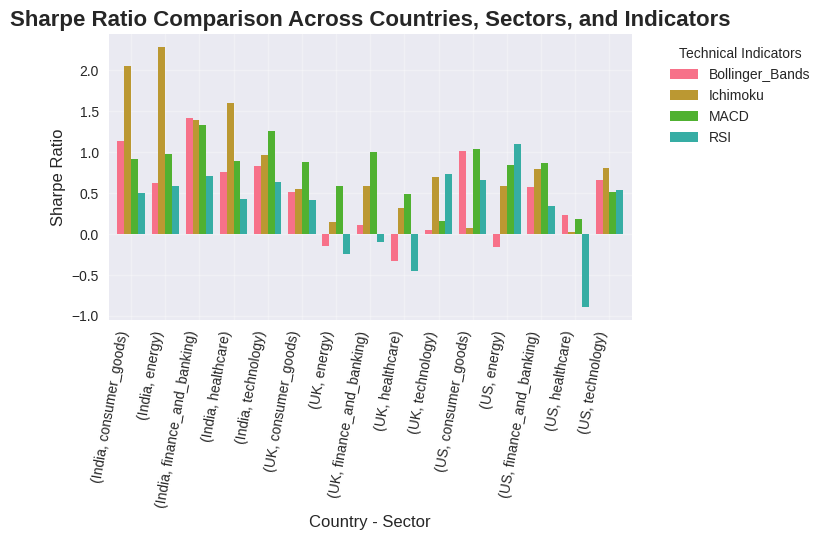

<Figure size 1500x1000 with 0 Axes>

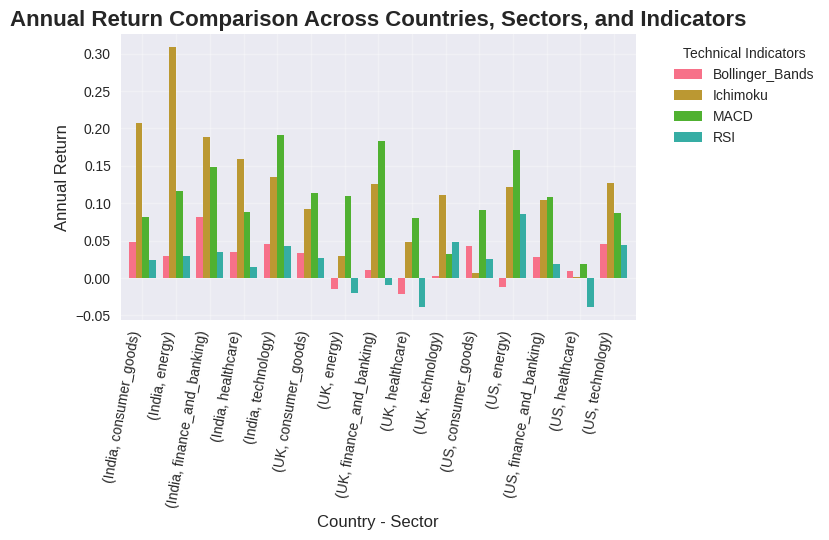

<Figure size 1500x1000 with 0 Axes>

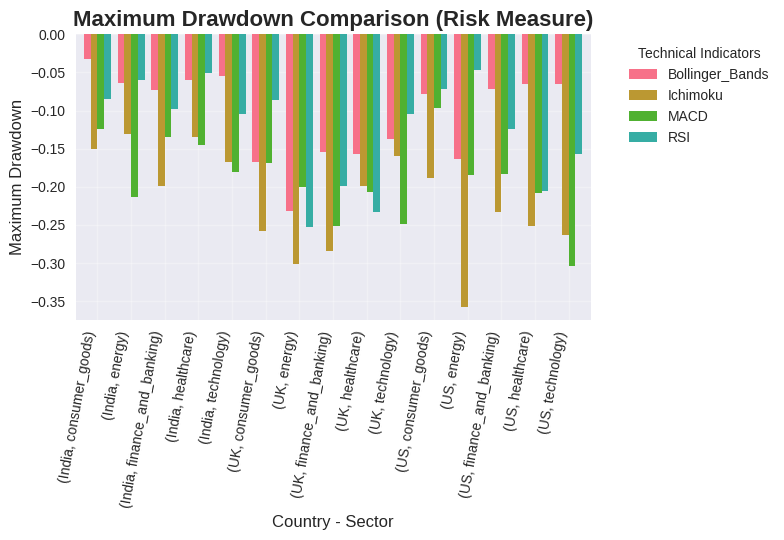

<Figure size 1500x1000 with 0 Axes>

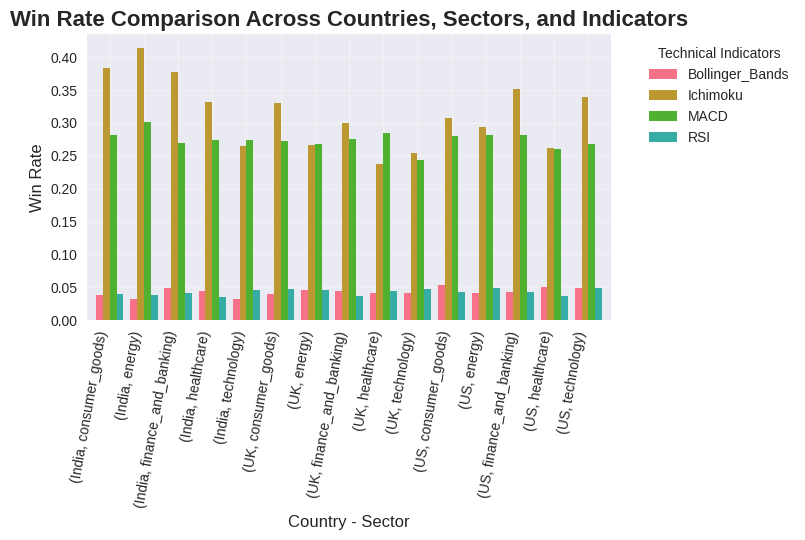

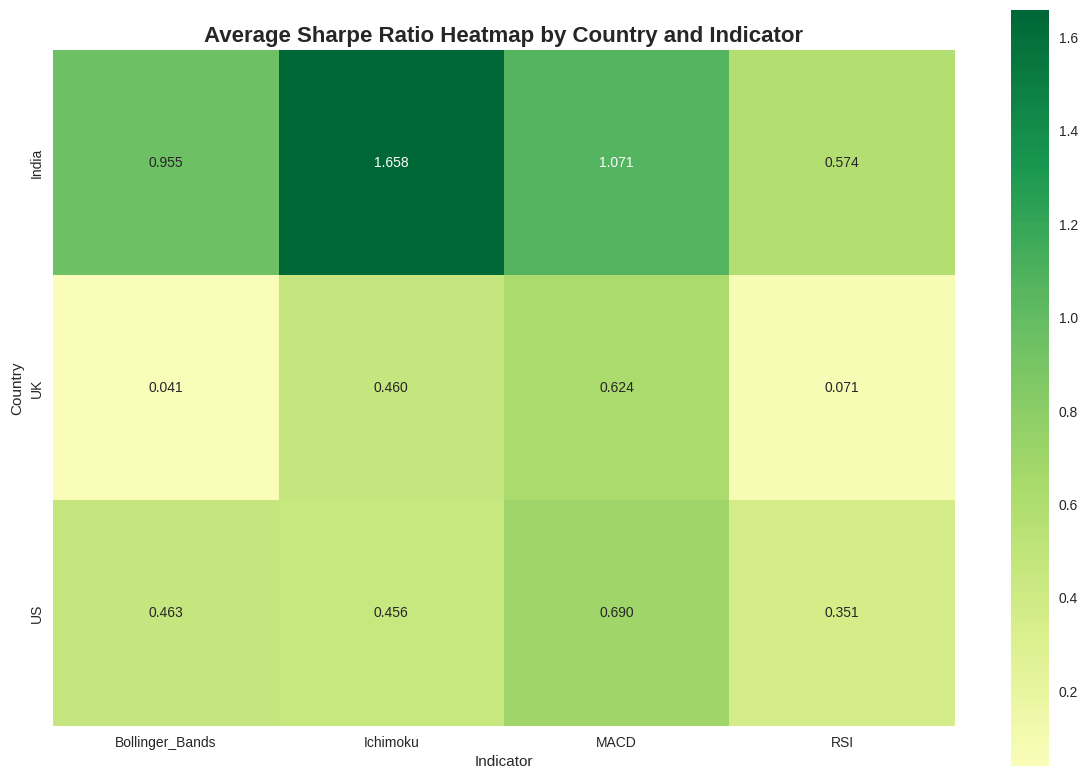

<Figure size 1500x1000 with 0 Axes>

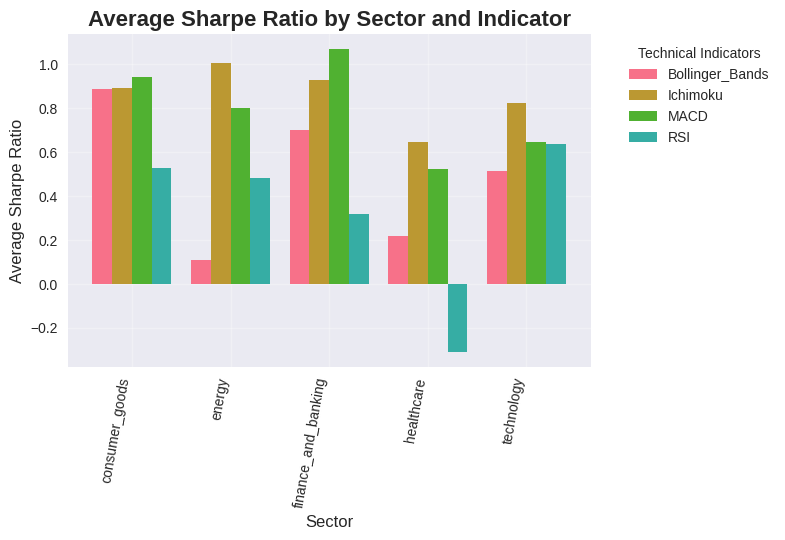

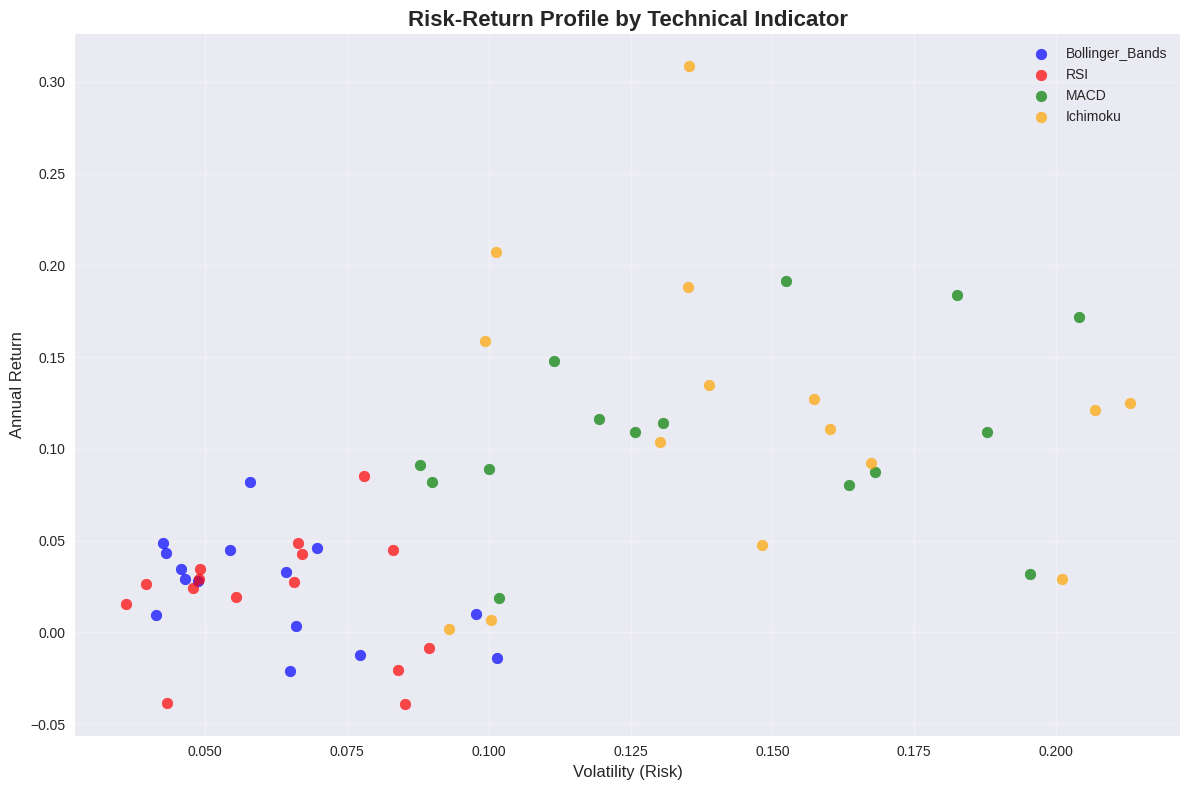


TECHNICAL INDICATORS PERFORMANCE SUMMARY

1. OVERALL INDICATOR PERFORMANCE (Average across all markets and sectors)
----------------------------------------------------------------------
                 annual_return  sharpe_ratio  max_drawdown  win_rate
Indicator                                                           
Bollinger_Bands         0.0244        0.4863       -0.1051    0.0433
Ichimoku                0.1176        0.8581       -0.2184    0.3140
MACD                    0.1083        0.7950       -0.1900    0.2745
RSI                     0.0194        0.3318       -0.1253    0.0429

2. BEST PERFORMING INDICATORS BY METRIC
--------------------------------------------------
Annual Return: Ichimoku
Sharpe Ratio: Ichimoku
Win Rate: Ichimoku
Max Drawdown: Ichimoku

3. COUNTRY-WISE AVERAGE PERFORMANCE
----------------------------------------
         annual_return  sharpe_ratio  max_drawdown  win_rate
Country                                                     
India           0

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style for professional plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class TechnicalIndicatorAnalyzer:
    def __init__(self, data_path="../data"):
        self.data_path = Path(data_path)
        self.countries = ['India', 'US', 'UK']
        self.sectors = ['consumer_goods', 'energy', 'finance_and_banking', 'healthcare', 'technology']
        self.indicators = ['Bollinger_Bands', 'RSI', 'MACD', 'Ichimoku']
        self.results = {}
        
    def load_data(self, country, sector):
        """Load OHLCV data for a specific country and sector"""
        # Assuming CSV files are named by sector in each country folder
        file_path = self.data_path / country / f"{sector}.csv"
        if file_path.exists():
            df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
            return df.sort_index()
        return None
    
    def calculate_bollinger_bands(self, data, period=20, std_dev=2):
        """Calculate Bollinger Bands and generate signals"""
        close = data['Close']
        
        # Calculate middle band (SMA)
        middle_band = close.rolling(window=period).mean()
        
        # Calculate standard deviation
        std = close.rolling(window=period).std()
        
        # Calculate upper and lower bands
        upper_band = middle_band + (std * std_dev)
        lower_band = middle_band - (std * std_dev)
        
        # Generate signals
        signals = pd.Series(0, index=close.index)
        
        # Buy when price crosses below lower band (oversold)
        buy_signals = (close < lower_band) & (close.shift(1) >= lower_band.shift(1))
        
        # Sell when price crosses above upper band (overbought)
        sell_signals = (close > upper_band) & (close.shift(1) <= upper_band.shift(1))
        
        # Buy on middle band breakout
        middle_breakout = (close > middle_band) & (close.shift(1) <= middle_band.shift(1))
        
        signals[buy_signals | middle_breakout] = 1
        signals[sell_signals] = -1
        
        return signals
    
    def calculate_rsi(self, data, period=14, oversold=30, overbought=70):
        """Calculate RSI and generate signals"""
        close = data['Close']
        delta = close.diff()
        
        gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
        
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))
        
        # Generate signals
        signals = pd.Series(0, index=close.index)
        
        # Buy when RSI crosses above oversold level
        buy_oversold = (rsi < oversold) & (rsi.shift(1) >= oversold)
        
        # Sell when RSI crosses above overbought level
        sell_overbought = (rsi > overbought) & (rsi.shift(1) <= overbought)
        
        # Buy when RSI crosses above 50 (momentum)
        buy_momentum = (rsi > 50) & (rsi.shift(1) <= 50)
        
        signals[buy_oversold | buy_momentum] = 1
        signals[sell_overbought] = -1
        
        return signals
    
    def calculate_macd(self, data, fast=12, slow=26, signal_period=9):
        """Calculate MACD and generate signals"""
        close = data['Close']
        
        # Calculate EMAs
        ema_fast = close.ewm(span=fast).mean()
        ema_slow = close.ewm(span=slow).mean()
        
        # Calculate MACD line
        macd = ema_fast - ema_slow
        
        # Calculate signal line
        signal_line = macd.ewm(span=signal_period).mean()
        
        # Calculate histogram
        histogram = macd - signal_line
        
        # Generate signals
        signals = pd.Series(0, index=close.index)
        
        # Buy when MACD crosses above signal line
        buy_signals = (macd > signal_line) & (macd.shift(1) <= signal_line.shift(1))
        
        # Sell when MACD crosses below signal line
        sell_signals = (macd < signal_line) & (macd.shift(1) >= signal_line.shift(1))
        
        # Additional momentum signal when histogram is positive
        momentum_signals = histogram > 0
        
        signals[buy_signals | momentum_signals] = 1
        signals[sell_signals] = -1
        
        return signals
    
    def calculate_ichimoku(self, data, tenkan=9, kijun=26, senkou_b=52):
        """Calculate Ichimoku Cloud and generate signals"""
        high = data['High']
        low = data['Low']
        close = data['Close']
        
        # Calculate Tenkan-sen (Conversion Line)
        tenkan_sen = (high.rolling(window=tenkan).max() + low.rolling(window=tenkan).min()) / 2
        
        # Calculate Kijun-sen (Base Line)
        kijun_sen = (high.rolling(window=kijun).max() + low.rolling(window=kijun).min()) / 2
        
        # Calculate Senkou Span A (Leading Span 1)
        senkou_span_a = ((tenkan_sen + kijun_sen) / 2).shift(kijun)
        
        # Calculate Senkou Span B (Leading Span 2)
        senkou_span_b = ((high.rolling(window=senkou_b).max() + 
                         low.rolling(window=senkou_b).min()) / 2).shift(kijun)
        
        # Calculate Chikou Span (Lagging Span)
        chikou_span = close.shift(-kijun)
        
        # Generate signals
        signals = pd.Series(0, index=close.index)
        
        # Strong bullish signal
        bullish_conditions = (
            (tenkan_sen > kijun_sen) & 
            (close > senkou_span_a.combine(senkou_span_b, max)) &
            (chikou_span > close.shift(kijun))
        )
        
        # Strong bearish signal
        bearish_conditions = (
            (tenkan_sen < kijun_sen) & 
            (close < senkou_span_a.combine(senkou_span_b, min)) &
            (chikou_span < close.shift(kijun))
        )
        
        # Above cloud continuation
        above_cloud = close > senkou_span_a.combine(senkou_span_b, max)
        
        signals[bullish_conditions | above_cloud] = 1
        signals[bearish_conditions] = -1
        
        return signals
    
    def calculate_returns(self, data, signals):
        """Calculate strategy returns based on signals"""
        close = data['Close']
        returns = close.pct_change()
        
        # Strategy returns (assuming we can go long/short)
        strategy_returns = signals.shift(1) * returns
        
        # For long-only strategy, convert -1 signals to 0
        long_only_signals = signals.copy()
        long_only_signals[long_only_signals == -1] = 0
        long_only_returns = long_only_signals.shift(1) * returns
        
        return strategy_returns, long_only_returns
    
    def calculate_performance_metrics(self, returns, trading_days=252):
        """Calculate comprehensive performance metrics"""
        returns = returns.dropna()
        
        if len(returns) == 0 or returns.std() == 0:
            return {
                'total_return': 0, 'annual_return': 0, 'volatility': 0,
                'sharpe_ratio': 0, 'sortino_ratio': 0, 'max_drawdown': 0,
                'calmar_ratio': 0, 'win_rate': 0, 'profit_factor': 0
            }
        
        # Basic metrics
        total_return = (1 + returns).prod() - 1
        annual_return = (1 + returns.mean()) ** trading_days - 1
        volatility = returns.std() * np.sqrt(trading_days)
        
        # Risk-adjusted metrics
        sharpe_ratio = annual_return / volatility if volatility != 0 else 0
        
        # Sortino ratio
        downside_returns = returns[returns < 0]
        downside_std = downside_returns.std() * np.sqrt(trading_days)
        sortino_ratio = annual_return / downside_std if downside_std != 0 else 0
        
        # Maximum drawdown
        cumulative = (1 + returns).cumprod()
        running_max = cumulative.expanding().max()
        drawdown = (cumulative - running_max) / running_max
        max_drawdown = drawdown.min()
        
        # Calmar ratio
        calmar_ratio = annual_return / abs(max_drawdown) if max_drawdown != 0 else 0
        
        # Win rate and profit factor
        positive_returns = returns[returns > 0]
        negative_returns = returns[returns < 0]
        win_rate = len(positive_returns) / len(returns) if len(returns) > 0 else 0
        
        total_gains = positive_returns.sum()
        total_losses = abs(negative_returns.sum())
        profit_factor = total_gains / total_losses if total_losses != 0 else float('inf')
        
        return {
            'total_return': total_return,
            'annual_return': annual_return,
            'volatility': volatility,
            'sharpe_ratio': sharpe_ratio,
            'sortino_ratio': sortino_ratio,
            'max_drawdown': max_drawdown,
            'calmar_ratio': calmar_ratio,
            'win_rate': win_rate,
            'profit_factor': profit_factor
        }
    
    def analyze_all_combinations(self):
        """Analyze all country-sector-indicator combinations"""
        print("Starting comprehensive analysis...")
        
        for country in self.countries:
            print(f"Analyzing {country}...")
            self.results[country] = {}
            
            for sector in self.sectors:
                print(f"  Processing {sector}...")
                data = self.load_data(country, sector)
                
                if data is None:
                    print(f"    Warning: No data found for {country}/{sector}")
                    continue
                
                self.results[country][sector] = {}
                
                # Calculate signals for each indicator
                bb_signals = self.calculate_bollinger_bands(data)
                rsi_signals = self.calculate_rsi(data)
                macd_signals = self.calculate_macd(data)
                ichimoku_signals = self.calculate_ichimoku(data)
                
                signals_dict = {
                    'Bollinger_Bands': bb_signals,
                    'RSI': rsi_signals,
                    'MACD': macd_signals,
                    'Ichimoku': ichimoku_signals
                }
                
                # Calculate performance for each indicator
                for indicator, signals in signals_dict.items():
                    strategy_returns, long_only_returns = self.calculate_returns(data, signals)
                    
                    # Use long-only returns for mutual funds analysis
                    metrics = self.calculate_performance_metrics(long_only_returns)
                    self.results[country][sector][indicator] = metrics
        
        print("Analysis complete!")
    
    def create_performance_summary(self):
        """Create a comprehensive performance summary DataFrame"""
        summary_data = []
        
        for country in self.results:
            for sector in self.results[country]:
                for indicator in self.results[country][sector]:
                    metrics = self.results[country][sector][indicator]
                    summary_data.append({
                        'Country': country,
                        'Sector': sector,
                        'Indicator': indicator,
                        **metrics
                    })
        
        return pd.DataFrame(summary_data)
    
    def plot_performance_comparison(self, save_plots=True):
        """Create comprehensive performance comparison plots"""
        summary_df = self.create_performance_summary()
        
        if summary_df.empty:
            print("No data available for plotting")
            return
        
        # Set up the plotting style
        fig_size = (15, 10)
        
        # 1. Sharpe Ratio Comparison
        plt.figure(figsize=fig_size)
        pivot_sharpe = summary_df.pivot_table(
            values='sharpe_ratio', 
            index=['Country', 'Sector'], 
            columns='Indicator'
        )
        
        ax = pivot_sharpe.plot(kind='bar', width=0.8)
        plt.title('Sharpe Ratio Comparison Across Countries, Sectors, and Indicators', 
                 fontsize=16, fontweight='bold')
        plt.xlabel('Country - Sector', fontsize=12)
        plt.ylabel('Sharpe Ratio', fontsize=12)
        plt.xticks(rotation=80, ha='right')
        plt.legend(title='Technical Indicators', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        if save_plots:
            plt.savefig('sharpe_ratio_comparison.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # 2. Annual Return Comparison
        plt.figure(figsize=fig_size)
        pivot_return = summary_df.pivot_table(
            values='annual_return', 
            index=['Country', 'Sector'], 
            columns='Indicator'
        )
        
        ax = pivot_return.plot(kind='bar', width=0.8)
        plt.title('Annual Return Comparison Across Countries, Sectors, and Indicators', 
                 fontsize=16, fontweight='bold')
        plt.xlabel('Country - Sector', fontsize=12)
        plt.ylabel('Annual Return', fontsize=12)
        plt.xticks(rotation=80, ha='right')
        plt.legend(title='Technical Indicators', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        if save_plots:
            plt.savefig('annual_return_comparison.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # 3. Maximum Drawdown Comparison (Risk Measure)
        plt.figure(figsize=fig_size)
        pivot_dd = summary_df.pivot_table(
            values='max_drawdown', 
            index=['Country', 'Sector'], 
            columns='Indicator'
        )
        
        ax = pivot_dd.plot(kind='bar', width=0.8)
        plt.title('Maximum Drawdown Comparison (Risk Measure)', 
                 fontsize=16, fontweight='bold')
        plt.xlabel('Country - Sector', fontsize=12)
        plt.ylabel('Maximum Drawdown', fontsize=12)
        plt.xticks(rotation=80, ha='right')
        plt.legend(title='Technical Indicators', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        if save_plots:
            plt.savefig('max_drawdown_comparison.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # 4. Win Rate Comparison
        plt.figure(figsize=fig_size)
        pivot_wr = summary_df.pivot_table(
            values='win_rate', 
            index=['Country', 'Sector'], 
            columns='Indicator'
        )
        
        ax = pivot_wr.plot(kind='bar', width=0.8)
        plt.title('Win Rate Comparison Across Countries, Sectors, and Indicators', 
                 fontsize=16, fontweight='bold')
        plt.xlabel('Country - Sector', fontsize=12)
        plt.ylabel('Win Rate', fontsize=12)
        plt.xticks(rotation=80, ha='right')
        plt.legend(title='Technical Indicators', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        if save_plots:
            plt.savefig('win_rate_comparison.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # 5. Heatmap of Sharpe Ratios by Country and Indicator
        plt.figure(figsize=(12, 8))
        
        # Average Sharpe ratio by country and indicator
        country_indicator_sharpe = summary_df.groupby(['Country', 'Indicator'])['sharpe_ratio'].mean().unstack()
        
        sns.heatmap(country_indicator_sharpe, 
                   annot=True, 
                   cmap='RdYlGn', 
                   center=0,
                   fmt='.3f',
                   square=True)
        plt.title('Average Sharpe Ratio Heatmap by Country and Indicator', 
                 fontsize=16, fontweight='bold')
        plt.tight_layout()
        if save_plots:
            plt.savefig('sharpe_ratio_heatmap.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # 6. Sector Performance Summary
        plt.figure(figsize=fig_size)
        
        sector_performance = summary_df.groupby(['Sector', 'Indicator'])['sharpe_ratio'].mean().unstack()
        ax = sector_performance.plot(kind='bar', width=0.8)
        plt.title('Average Sharpe Ratio by Sector and Indicator', 
                 fontsize=16, fontweight='bold')
        plt.xlabel('Sector', fontsize=12)
        plt.ylabel('Average Sharpe Ratio', fontsize=12)
        plt.xticks(rotation=80, ha='right')
        plt.legend(title='Technical Indicators', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        if save_plots:
            plt.savefig('sector_performance_summary.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # 7. Risk-Return Scatter Plot
        plt.figure(figsize=(12, 8))
        
        colors = {'Bollinger_Bands': 'blue', 'RSI': 'red', 'MACD': 'green', 'Ichimoku': 'orange'}
        
        for indicator in self.indicators:
            indicator_data = summary_df[summary_df['Indicator'] == indicator]
            plt.scatter(indicator_data['volatility'], 
                       indicator_data['annual_return'],
                       c=colors[indicator], 
                       label=indicator, 
                       alpha=0.7, 
                       s=60)
        
        plt.xlabel('Volatility (Risk)', fontsize=12)
        plt.ylabel('Annual Return', fontsize=12)
        plt.title('Risk-Return Profile by Technical Indicator', fontsize=16, fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        if save_plots:
            plt.savefig('risk_return_scatter.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def generate_summary_statistics(self):
        """Generate summary statistics for the dissertation"""
        summary_df = self.create_performance_summary()
        
        if summary_df.empty:
            print("No data available for summary statistics")
            return
        
        print("\n" + "="*80)
        print("TECHNICAL INDICATORS PERFORMANCE SUMMARY")
        print("="*80)
        
        # Overall indicator performance
        print("\n1. OVERALL INDICATOR PERFORMANCE (Average across all markets and sectors)")
        print("-" * 70)
        
        overall_stats = summary_df.groupby('Indicator')[
            ['annual_return', 'sharpe_ratio', 'max_drawdown', 'win_rate']
        ].mean()
        
        print(overall_stats.round(4))
        
        # Best performing indicator by metric
        print("\n2. BEST PERFORMING INDICATORS BY METRIC")
        print("-" * 50)
        
        best_indicators = {}
        metrics = ['annual_return', 'sharpe_ratio', 'win_rate']
        risk_metrics = ['max_drawdown']  # Lower is better for these
        
        for metric in metrics:
            best_indicators[metric] = overall_stats[metric].idxmax()
        
        for metric in risk_metrics:
            best_indicators[metric] = overall_stats[metric].idxmin()  # Min drawdown is best
        
        for metric, indicator in best_indicators.items():
            print(f"{metric.replace('_', ' ').title()}: {indicator}")
        
        # Country-wise performance
        print("\n3. COUNTRY-WISE AVERAGE PERFORMANCE")
        print("-" * 40)
        
        country_stats = summary_df.groupby('Country')[
            ['annual_return', 'sharpe_ratio', 'max_drawdown', 'win_rate']
        ].mean()
        
        print(country_stats.round(4))
        
        # Sector-wise performance
        print("\n4. SECTOR-WISE AVERAGE PERFORMANCE")
        print("-" * 40)
        
        sector_stats = summary_df.groupby('Sector')[
            ['annual_return', 'sharpe_ratio', 'max_drawdown', 'win_rate']
        ].mean()
        
        print(sector_stats.round(4))
        
        # Save detailed results to CSV
        summary_df.to_csv('detailed_performance_results.csv', index=False)
        print(f"\nDetailed results saved to 'detailed_performance_results.csv'")
        
        return summary_df

# Main execution
if __name__ == "__main__":
    # Initialize the analyzer
    analyzer = TechnicalIndicatorAnalyzer()
    
    # Run the complete analysis
    analyzer.analyze_all_combinations()
    
    # Generate plots
    print("\nGenerating performance comparison plots...")
    analyzer.plot_performance_comparison(save_plots=True)
    
    # Generate summary statistics
    results_df = analyzer.generate_summary_statistics()
    
    print("\n" + "="*80)
    print("ANALYSIS COMPLETE!")
    print("="*80)
    print("Generated files:")
    print("- sharpe_ratio_comparison.png")
    print("- annual_return_comparison.png") 
    print("- max_drawdown_comparison.png")
    print("- win_rate_comparison.png")
    print("- sharpe_ratio_heatmap.png")
    print("- sector_performance_summary.png")
    print("- risk_return_scatter.png")
    print("- detailed_performance_results.csv")
    print("\nUse these visualizations in your dissertation to demonstrate")
    print("which technical indicators perform best across different markets and sectors.")